<a href="https://colab.research.google.com/github/angeleneronqs/PythonProjects/blob/main/Kaggle_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scaling and Normalization**

**Scaling vs. Normalization**
* In **scaling**, you are changing the *range* of your data.
* In **normalization**, you are changing the *shape* of the distribution of your data.

# **Scaling**

Scaling just changes the **scale of your data.**

This means transforming your data so it fits within a specific scale like, 0-100, or 0-1.

You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN)

**Example:**

Scaling the difference between 1 dollar and 1 Philippine peso. With currency, you can convert between currencies.

For height and weight, how many pounds should equal one inch or how many kilos should equal one meter.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# For Box-Cox Transformation
from scipy import stats

# For min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Scaled Data')

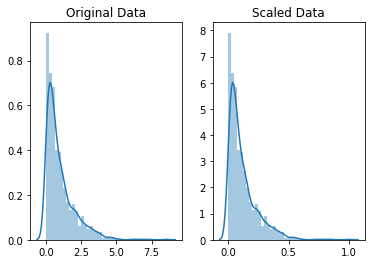

In [ ]:
# Generate 1000 data points randomly drwan from an exponential distribution
original_data = np.random.exponential(size = 1000)

# Mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# Plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled Data")

Notice that the *shape* doesn't change, but the initial range from 0 to 8-ish, now ranges from 0 to 1.

# **Normalization**

Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.


> **Normal distribution:** Also known as the "bell surve", this is a specific statistical distribtuion where a roughly equal observations fall above and below the mean.
The mean and median are the same and there are more observations close to the mean. The normal distribution is also known as the Gaussian distribution.

Generally, you will normalize your data if you are going to use a machine learning or statistic technique that assumes your data is normally distributed.

Example: Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes


**Box-Cox Transformation**
method use to normalize here:


Text(0.5, 1.0, 'Normalized Data')

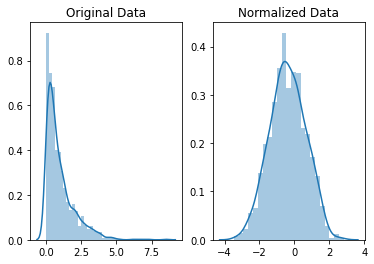

In [ ]:
# Normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# Plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized Data")

Notice that the *shape* of the data has changed. Before normalizing it was almost L-shaped. But after normalizing, it looks more like the outline of a bell. Hence, bell-shaped.

# **Exercise**

To practice scaling and normalization, we're going to use a [dataset of Kickstarter ](https://https://www.kaggle.com/kemical/kickstarter-projects)campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

*Note: Load the libraries above.*

In [ ]:
# Load and read data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

In [ ]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Start by scaling the goals of each campain, which is how much money they were asking for. The plots show a histogram of the values on the "usd_goal_real" column, both before and after scaling.

## Scaling the **usd_goal_real** column

Text(0.5, 1.0, 'Scaled Data')

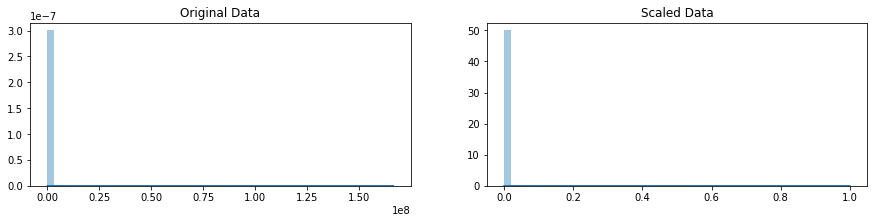

In [ ]:
# Select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# Scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns = ['usd_goal_real'])

# Plot the original & scaled data together to compare
fig, ax = plt.subplots(1,2, figsize = (15,3))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

After scaling, all values lie between 0 and 1.

Verify in the code below:

In [ ]:
# Original Data
print('Original Data\nPreview:\n' , original_data.head())
print('Minimum value: ', float(original_data.min()),
      '\nMaximum value: ', float(original_data.max()))
print('_'*30)

# Scaled Data
print('Scaled Data\nPreview:\n', scaled_data.head())
print('Minimum Value:', float(scaled_data.min()),
      'Maximum Value:', float(scaled_data.max()))

Original Data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value:  0.01 
Maximum value:  166361390.71
______________________________
Scaled Data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum Value: 0.0 Maximum Value: 1.0


## Scaling the **goal** column

In [ ]:
# Select the goal column
original_goal_data  = pd.DataFrame(kickstarters_2017.goal)

Use *original_goal_data* to create a new DataFrame s*caled_goal_data* with values scaled between 0 and 1. 

You must use *the minimax_scaling()* function.

In [ ]:
# Create a scaled goal data
scaled_goal_data = minmax_scaling(original_goal_data, columns = ['goal'] )

## Normalizing the **usd_pledged_real** column

Text(0.5, 1.0, 'Normalized Data')

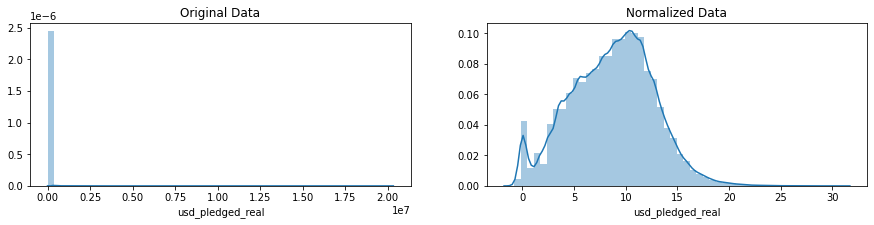

In [ ]:
# Get the index of all positive pledges (BoxCox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# Get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges] 

# Normalize the pledges (with Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], name = 'usd_pledged_real', index = positive_pledges.index)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_pledges, ax = ax[1])
ax[1].set_title("Normalized Data")

Verify in the code below:

In [ ]:
# Original Data
print('Original Data\nPreview:\n', positive_pledges.head())
print('Minimum Value: ', float(positive_pledges.min()),
      '\nMaximum Value: ', float(positive_pledges.max()))
print('_' * 30)

# Normalized Data
print('Normalized Data\nPreview:\n', normalized_pledges.head())
print('Minimum Value:', float(normalized_pledges.min()),
      '\nMaximum Value:', float(normalized_pledges.max()))

Original Data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum Value:  0.45 
Maximum Value:  20338986.27
______________________________
Normalized Data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum Value: -0.7779954122762203 
Maximum Value: 30.69054020451361


## Normalizing the **pledged** column

Text(0.5, 1.0, 'Normalized Data')

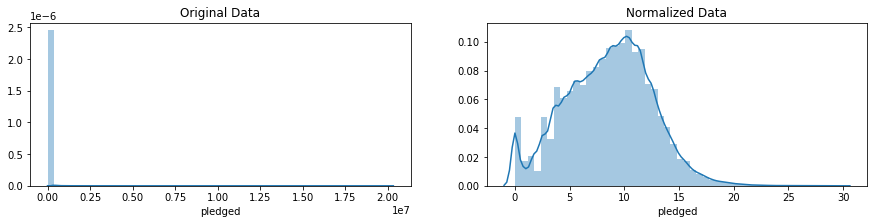

In [ ]:
# Get the index of positive values in the 'pledged' column
index_of_positive_pledged = kickstarters_2017.pledged > 0

# Get the positive values in the 'pledged' column
original_positive_pledged = kickstarters_2017.pledged.loc[index_of_positive_pledged]

# Normalizing data
normalized_positive_pledged = pd.Series(stats.boxcox(original_positive_pledged)[0], name = 'pledged', index = original_positive_pledged.index)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.distplot(original_positive_pledged, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_positive_pledged, ax = ax[1])
ax[1].set_title("Normalized Data")


The distributions in the normalized data of "usd_pledged_real" column and "pledged" column look mostly the same.

(Optional) More practice
Try finding a new dataset and pretend you're preparing to perform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge).

[These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)

Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

Keep going
In the next lesson, learn how to parse dates in a dataset.

# **Parsing Dates**

We'll be working with a dataset that contains information on landslides that occured between 2007 and 2016.

DataSet: [Landslide After Rainfall, 2007-2016](https://www.kaggle.com/nasa/landslide-events)

In [ ]:
# Libraries to use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Set seed for reproducibility
np.random.seed(0)

In [ ]:
# Read in our data
landslides = pd.read_csv("landslides_catalog.csv")

In [ ]:
# Check the data type of our date column
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
# Print the first few rows of the data column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Date Format: month / day / two-digit year

format="%m/%d%y"

Notice at the bottom of the output, the data type of the column is "object"

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation here, you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.



In [ ]:
# Check the data type of our data column
landslides['date'].dtype

dtype('O')

"O" is the code for "object"

## Convert date columns to datetime

This is called "parsing dates" because we are taking in a string and identifying its component parts.

> Guide for format of dates:  ["strftime directive"](https://strftime.org/)

There are lots of possible parts of a date, but the most common are **%d** *for day*, **%m** *for month*, **%y** f*or a two-digit year* and **%Y** *for a four digit year*.

Some examples:

* 1/17/07 has the format "%m/%d/%y"
* 17-1-2007 has the format "%d-%m-%Y"

In [ ]:
# Create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")


In [ ]:
# print first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

**dtype** is now *datetime64* and dates have been slightly rearranged so they fit the default order datetime objects (year-month-day)

Now that our dates are parsed correctly, we can interact with them in useful ways.


---


1. **What if I run into an error with multiple date formats?** 
While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. 
> If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:
`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

2. **Why don't you always use infer_datetime_format = True?** 
There are two big reasons not to always have pandas guess the time format. 

 **a.** The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. 

 **b.** The second is that it's much slower than specifying the exact format of the dates.

## **Select the day of the month**

In [ ]:
# Get the day of the month from date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## **Plot the day of the month to check the date parsing**

One of the biggest dangers in parsing dates is mixing up the months and days. The `to_datetime()` function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) 

Let's see if that's the case:

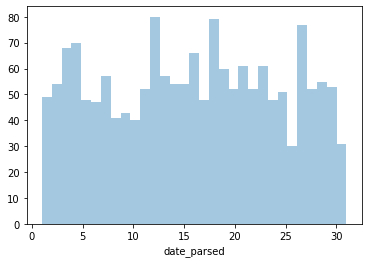

In [ ]:
# Remove NA's
day_of_month_landslides = day_of_month_landslides.dropna()

# Plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

# **Exercise**

Using the dataset containing information on earthquakes between 1965 and 2016. 

In [ ]:
# read in our data
earthquakes = pd.read_csv("earthquakes_database.csv")

**1) Check the data type of our date column**

In [ ]:
# Check the data type of our date column
earthquakes['Date'].dtype

dtype('O')

**2) Convert our date columns to datetime**

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year". However, the entry at index 3378 follows a completely different pattern. Run the code cell below to see this.

In [ ]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed




> This does appear to be an issue with data entry: ideally, all entries in the column have the same format. We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.



In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64



> Looks like there are two more rows that has a date in a different format. Run the code cell below to obtain the indices corresponding to those rows and print the data.



In [ ]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,NaN,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,NaN,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,NaN,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


> Given all of this information, it's your turn to create a new column "date_parsed" in the earthquakes dataset that has correctly parsed dates in it.

Note: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns. Do not remove any rows from the dataset.

In [ ]:
for ind in indices:
    truncated = earthquakes.Date[ind][0:10]
    earthquakes.Date[ind] = truncated
    print(earthquakes.Date[ind])

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y", infer_datetime_format=True)   

1975-02-23
1985-04-28
2011-03-13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

**3) Select the day of the month**

> Create a Pandas Series `day_of_month_earthquakes `containing the day of the month from the "date_parsed" column.

In [ ]:
# Get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

**4) Plot the day of the month to check the date parsing**

Plot the days of the month from your earthquake dataset.

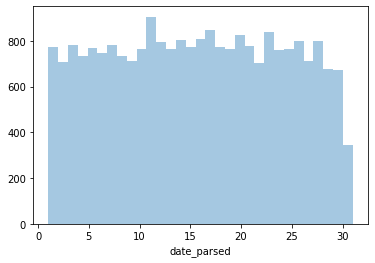

In [ ]:
sns.distplot(day_of_month_earthquakes, bins = 31, kde = False)

## **(Optional) Bonus Challenge**

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years

Run the next code cell to load the data.

## **(Optional) More practice**
If you're interested in graphing time series, [check out this tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them the parse_dates argument in read_csv. (The documention is [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

Keep going
In the next lesson, learn how to work with character encodings.